In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
start = '2012-01-01'
end = dt.datetime.now().strftime('%Y-%m-%d') # Make training data current
stock = 'GOOG'

data = yf.download(stock, start, end, auto_adjust=True)

data = yf.download(stock, start, end)
data.reset_index(inplace=True)

data

[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2039533333.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.449755,16.517492,16.127389,16.141482,147611217
1,2012-01-04,16.520702,16.569404,16.331338,16.440359,114989399
2,2012-01-05,16.291538,16.414156,16.222813,16.368669,131808205
3,2012-01-06,16.069294,16.316011,16.063607,16.294997,108119746
4,2012-01-09,15.387978,15.994637,15.357570,15.982275,233776981
...,...,...,...,...,...,...
3517,2025-12-29,314.390015,314.970001,311.899994,312.820007,12317700
3518,2025-12-30,314.549988,317.700012,313.250000,313.410004,11052500
3519,2025-12-31,313.799988,315.390015,312.200012,313.369995,10821500


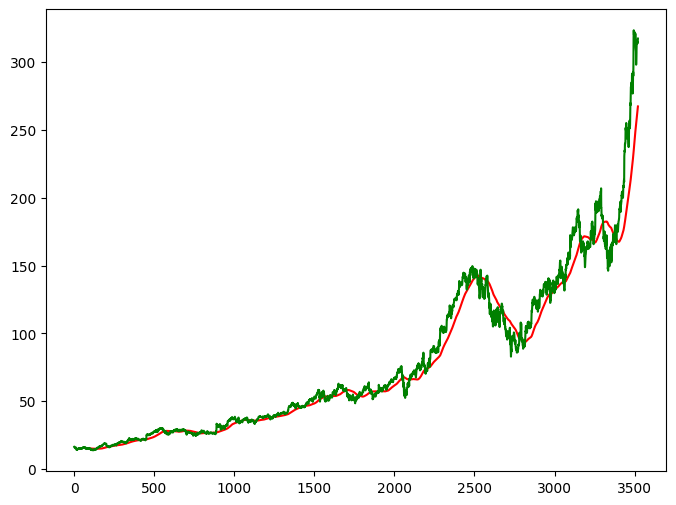

In [20]:
ma_100_days = data.Close.rolling(100).mean()

plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()


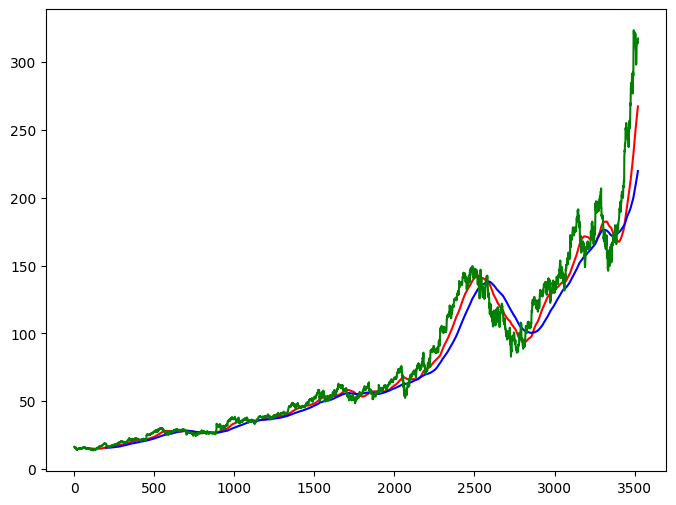

In [21]:
ma_200_days = data.Close.rolling(200).mean()

plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()


In [ ]:
data.dropna(inplace=True)

In [23]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

data_train.shape[0], data_test.shape[0]


(2817, 705)

In [24]:

scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)


In [25]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

x, y = np.array(x), np.array(y)

x.shape, y.shape


((2717, 100, 1), (2717,))

In [26]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 31s 292ms/step - loss: 0.0491
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 33s 389ms/step - loss: 0.0064
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 26s 301ms/step - loss: 0.0053
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 41s 296ms/step - loss: 0.0044
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 26s 302ms/step - loss: 0.0042
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 40s 296ms/step - loss: 0.0044
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 41s 295ms/step - loss: 0.0032
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 41s 303ms/step - loss: 0.0032
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 41s 301ms/step - loss: 0.0032
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - loss: 0.0028
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 40s 290ms/step - loss: 0.0029
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 41s 297ms/step - loss: 0.0031
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 41s 299ms/step - loss: 0.0029
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 25s 297ms/step - loss: 0.0024
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 25s 

In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [29]:
pas_100_days = data_train.tail(100)

data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [30]:
data_test_scale = scaler.fit_transform(data_test)

In [31]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x, y = np.array(x), np.array(y)

x.shape, y.shape

((705, 100, 1), (705,))

In [32]:
y_predict = model.predict(x)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step


In [33]:
scale = 1 / scaler.scale_

y_predict = y_predict * scale
y = y * scale

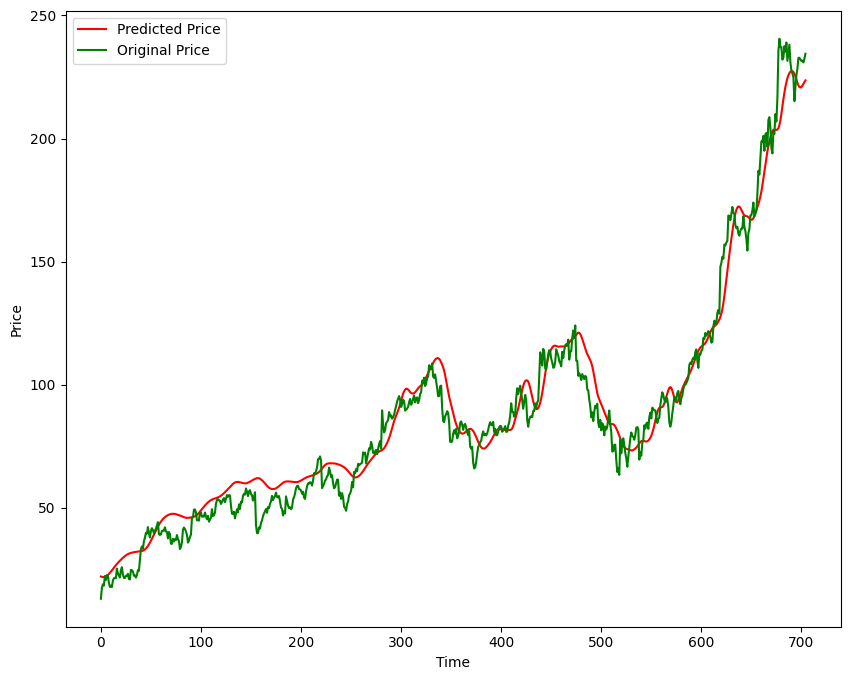

In [34]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [37]:
model.save('stock_pred_model_v1.keras')

Model Evaluation Metrics:
Mean Absolute Error (MAE)      : 6.57
Root Mean Squared Error (RMSE) : 8.39
Mean Absolute Percentage Error : 72.99%


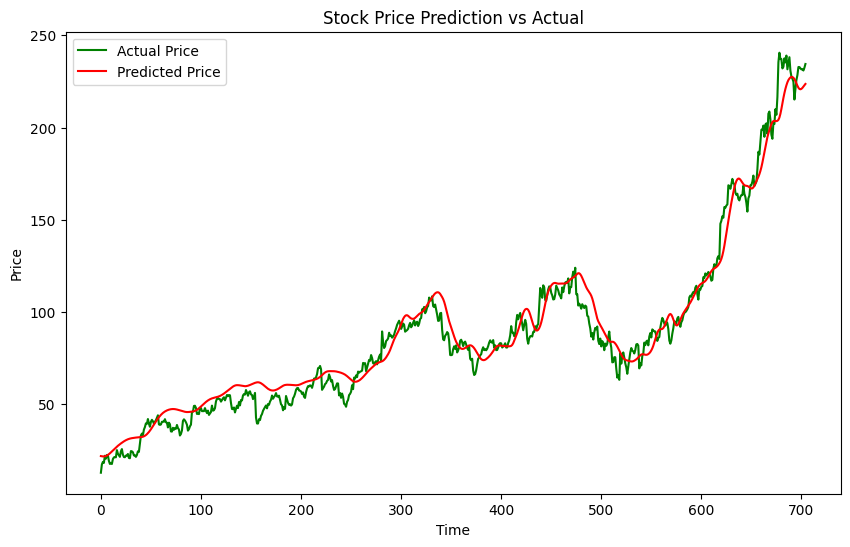

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate metrics
mae = mean_absolute_error(y, y_predict)
rmse = np.sqrt(mean_squared_error(y, y_predict))
mape = np.mean(np.abs((y - y_predict) / y)) * 100  # Mean Absolute Percentage Error

# Print results
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE)      : {mae:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse:.2f}")
print(f"Mean Absolute Percentage Error : {mape:.2f}%")

# Optional: plot prediction vs actual with legend
plt.figure(figsize=(10,6))
plt.plot(y, label="Actual Price", color="green")
plt.plot(y_predict, label="Predicted Price", color="red")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Stock Price Prediction vs Actual")
plt.legend()
plt.show()